In [ ]:
pip install -U dinkum-bio

In [16]:
import dinkum
from dinkum.vfg import Gene, Receptor
from dinkum.vfn import Tissue
from IPython.display import Image

We draw the model of Reciprocal repression GRN
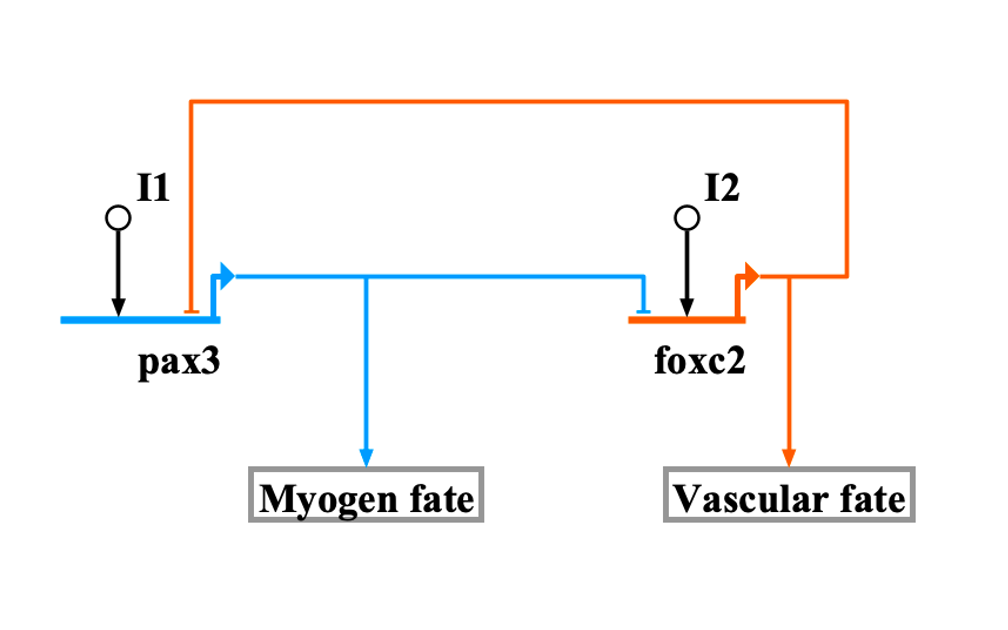

initializing: dinkum v0.3.3
start=1 stop=7


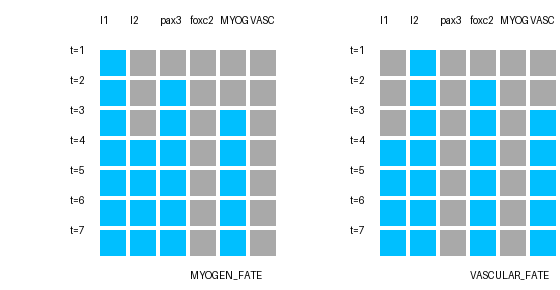

In [19]:
#GENERATE A BOOLEAN MODEL OF RECIPROCAL REPRESSION MODEL

dinkum.reset()

x = Gene(name='pax3')
y = Gene(name='foxc2')
i1 = Gene(name= 'I1')
i2 = Gene(name= 'I2')
o1 = Gene(name= 'MYOG')
o2 = Gene(name= 'VASC')

m = Tissue(name='MYOGEN_FATE')
n = Tissue(name= 'VASCULAR_FATE')

i1.is_present(where=m, start=1, duration=7)
i2.is_present(where=m, start=4, duration=4)
i2.is_present(where=n, start=1, duration=7)
i1.is_present(where=n, start=4, duration=4)

# now define a regulatory relationship!
x.and_not(activator= i1, repressor=y, delay=1)
o1.activated_by(source=x, delay=1)
y.and_not(activator= i2, repressor=x,delay=1)
o2.activated_by(source=y, delay=1)

# run for 7 ticks (1 to 7)
dinkum.run_and_display(stop=7, gene_names=(['I1', 'I2', 'pax3', 'foxc2', 'MYOG', 'VASC']))

THIS SUBCIRCUIT CONTROLS 2 DIFFERENT STATES (MYOGEN FATE AND VASCULAR FATE IN MOUSE SOMITIC CELLS)

initializing: dinkum v0.3.3
start=1 stop=7


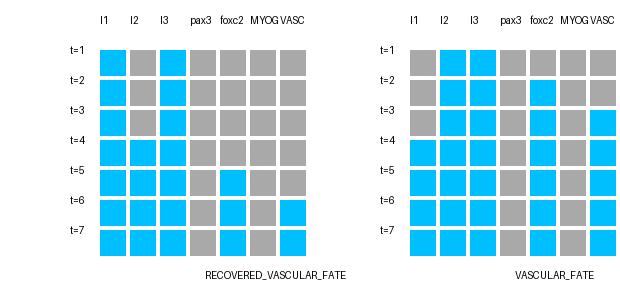

In [21]:
#GENERATE A BOOLEAN MODEL OF RECIPROCAL REPRESSION MODEL WITH ANOTHER REPRESOR INPUT TO PAX3

dinkum.reset()

def custom_represed_activated_or(I1, I3, foxc2):
    is_active = I1 and not (I3 or foxc2)
    return is_active
    
x = Gene(name='pax3')
y = Gene(name='foxc2')
i1 = Gene(name= 'I1')
i2 = Gene(name= 'I2')
o1 = Gene(name= 'MYOG')
o2 = Gene(name= 'VASC')
i3 = Gene(name= 'I3')

m = Tissue(name='RECOVERED_VASCULAR_FATE')
n = Tissue(name= 'VASCULAR_FATE')

i1.is_present(where=m, start=1, duration=7)
i2.is_present(where=m, start=4, duration=4)
i2.is_present(where=n, start=1, duration=7)
i1.is_present(where=n, start=4, duration=4)
i3.is_present(where=n, start=1, duration=7)
i3.is_present(where=m, start=1, duration=7)

# now define a regulatory relationship!
x.custom_activation(state_fn=custom_represed_activated_or, delay=1)
o1.activated_by(source=x, delay=1)
y.and_not(activator= i2, repressor=x, delay=1)
o2.activated_by(source=y, delay=1)


# run for 7 ticks (1 to 7)
dinkum.run_and_display(stop=7, gene_names=(['I1', 'I2', 'I3', 'pax3', 'foxc2', 'MYOG', 'VASC']))